In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
markers = ['o', 'v', 's', 'X', 'd', '*', 'p', '>']

In [3]:
csv_files = ['Tests/function_approx/csv_files/runge_max.csv',
             'Tests/function_approx/csv_files/abs_max.csv',
             'Tests/function_approx/csv_files/tan_max.csv']

In [16]:
df = pd.read_csv(csv_files[2], index_col=0)

In [17]:
df.tail(10)

,Bernstein,Linearized Bernstein,Polynomial,Natural Spline,SK,AAA,Poleless Barycentric
31,0.001919,0.033312,0.023308,0.001322,6.781217e-07,1.971756e-13,0.047342
32,0.001269,0.031668,0.021040,0.001328,9.441699e-08,1.149081e-13,0.043442
33,0.000920,0.029574,0.018978,0.001351,4.612634e-08,1.581513e-11,0.041327
34,0.001144,0.028100,0.017105,0.001348,8.625516e-08,2.131628e-14,0.040840
35,0.000697,0.026206,0.015484,0.001312,3.777841e-08,2.664535e-14,0.037130
36,0.000689,0.025036,0.014021,0.001284,5.068552e-08,8.677503e-13,0.025819
37,0.000676,0.023240,0.012688,0.001256,2.876380e-08,1.974643e-12,0.040418
38,0.000273,0.022337,0.011475,0.001214,2.295257e-07,1.614264e-13,0.037353
39,0.000634,0.020736,0.010372,0.001163,2.920854e-08,7.991385e-12,0.031410
40,0.000271,0.020033,0.009369,0.001117,1.615007e-08,1.132427e-12,0.026466


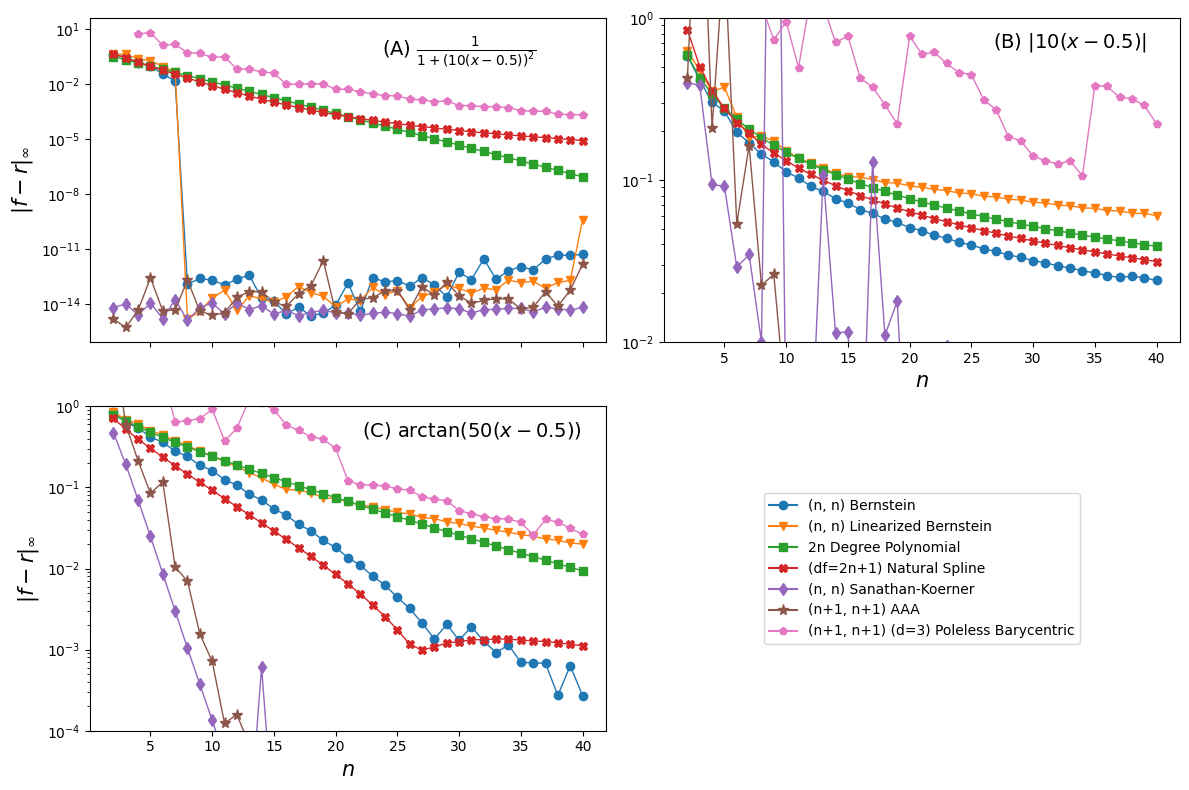

In [54]:
plt.figure(figsize=(12, 8))

for i, file in enumerate(csv_files):
    df = pd.read_csv(file, index_col=0)
    
    plt.subplot(2, 2, i + 1)
    
    j = 0
    for col in df.columns:
        if markers[j] == '*':
            plt.plot(df[col], marker=markers[j], markersize=8, linewidth=1)
        else:
            plt.plot(df[col], marker=markers[j], markersize=6, linewidth=1)
        j += 1
        
    plt.yscale('log')
    
    if i == 0:
        plt.ylabel('$\|f - r\|_{\infty}$', fontsize=15)
        plt.xticks(np.arange(5, 41, 5), ['' for _ in np.arange(5, 41, 5)])
        plt.text(30, 0.6, r"(A) $\frac{1}{1+(10(x - 0.5))^2}$", 
                 fontsize=14, horizontalalignment='center', verticalalignment='center')
    elif i == 1:
        plt.ylim(1e-2, 1)
        plt.xlabel('$n$', fontsize=15)
        plt.text(33, 0.7, r"(B) $|10(x - 0.5)|$", 
                 fontsize=14, horizontalalignment='center', verticalalignment='center')
    elif i == 2:
        plt.ylim(1e-4, 1)
        plt.ylabel('$\|f - r\|_{\infty}$', fontsize=15)
        plt.xlabel('$n$', fontsize=15)
        plt.text(31, 0.5, r"(C) $\arctan(50(x - 0.5))$", 
                 fontsize=14, horizontalalignment='center', verticalalignment='center')
            
    i += 1
    
fig = plt.subplot(2, 2, 4)
for j, col in enumerate(df.columns):
    if col in ['Bernstein', 'SK', 'Linearized Bernstein']:
        label = f"(n, n) {col}" if col != 'SK' else f"(n, n) Sanathan-Koerner"
    elif col == 'Polynomial':
        label = f"2n Degree Polynomial"
    elif col == 'Poleless Barycentric':
        label = f"(n+1, n+1) (d=3) {col}"
    elif col == 'Natural Spline':
        label = f"(df=2n+1) {col}"
    else:
        label = f"(n+1, n+1) {col}"
    
    if markers[j] == '*':
        plt.plot([], [], marker=markers[j], markersize=8, label=label)
    else:
        plt.plot([], [], marker=markers[j], markersize=6, label=label)
    
    plt.legend(loc='center')
    
    plt.axis('off')
    
plt.tight_layout()
plt.savefig('function_convergence.png', dpi=150)